<div style="
    text-align: center;
    font-size: 48px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;
    border-bottom: 3px solid #000000;">
    LOS ANGELES CRIME 
</div>

<div style="text-align: center;">
    <img src="https://github.com/BareLevi/Project_Ella_Tomer_Barel/blob/main/Header_image.jpeg?raw=true" alt="Alt text" width="700">
</div>



## Presenting by:
### TOMER MEIROVICH  
## links:

####  Kaggle: https://www.kaggle.com/datasets/asaniczka/crimes-in-los-angeles-2020-2023
- The creator of the data "Los Angeles Crime Data 2020-2023" in Kegel took the data from Official crime records of Los Angeles City
####
####  GitHub : https://github.com/TomerMeirovich1/LA-Crime-Data-Analysis/blob/main/data_analysis_LA_Crime.ipynb
####

####  Public policy institute of California : https://www.ppic.org/publication/poverty-in-california/
- From the Public Policy Institute of California we took information that supported us in the first conclusion about identity thieves in Hollenbeck


## Load the data into the program

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import warnings
import sys
import traceback

def merge_csv_files(file_paths):
    
    dataframes = []

    
    for file_path in file_paths:
        df = pd.read_csv(file_path)
        dataframes.append(df)


    merged_df = pd.concat(dataframes, ignore_index=True)
    
    return merged_df


file_paths = [
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_1.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_2.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_3.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_4.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_5.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_6.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_7.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_8.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_9.csv',
    r'https://raw.githubusercontent.com/BareLevi/Project_Ella_Tomer_Barel/main/Crime_Data_from_2020_to_Present_part_10.csv'
]

crime_data = merge_csv_files(file_paths)


##### Suppress Warnings

In [6]:
warnings.filterwarnings('ignore')
sys.tracebacklimit = 0

## 1.  Wrangling data

In [8]:
crime_data.dtypes

division_number          int64
date_reported           object
date_occurred           object
area                     int64
area_name               object
reporting_district       int64
part                     int64
crime_code               int64
crime_description       object
modus_operandi          object
victim_age               int64
victim_sex              object
victim_descent          object
premise_code           float64
premise_description     object
weapon_code            float64
weapon_description      object
status                  object
status_description      object
crime_code_1           float64
crime_code_2           float64
crime_code_3           float64
crime_code_4           float64
location                object
cross_street            object
latitude               float64
longitude              float64
dtype: object

#### 1.1 Noisy data
- Boxplot all numberic columns to check for exceptions


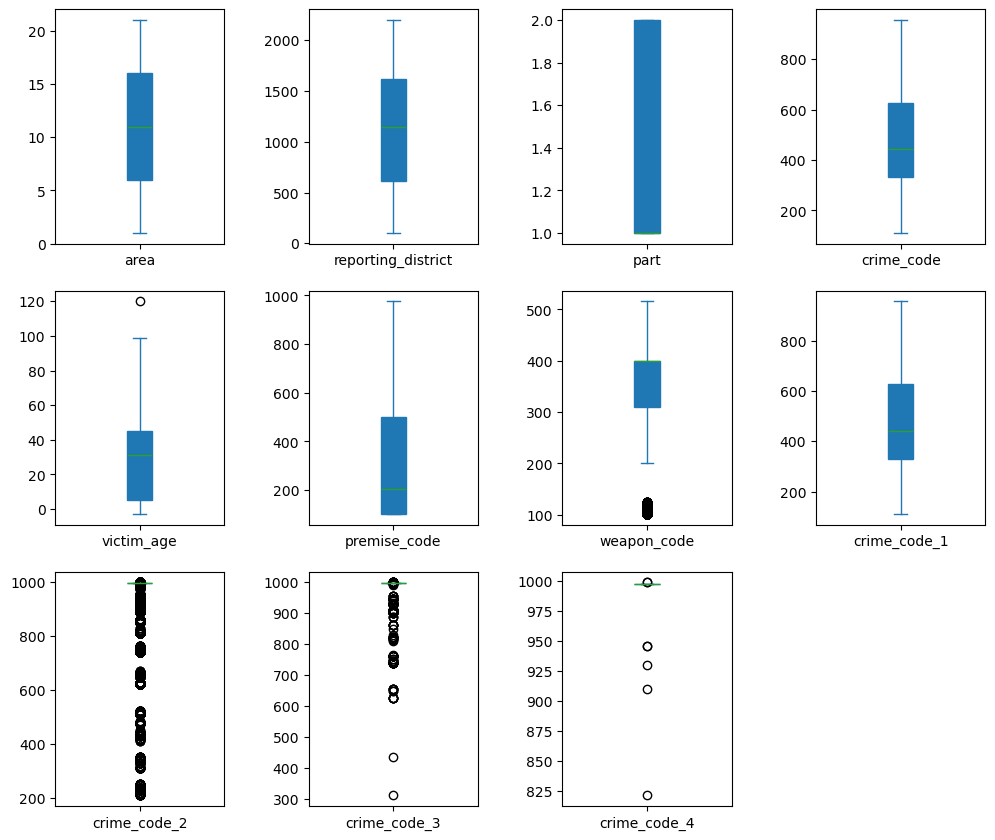

In [10]:
df_to_plot = crime_data.drop(columns=['latitude', 'longitude', 'division_number'])
df_to_plot = df_to_plot.select_dtypes(include=np.number)
df_to_plot.plot(subplots=True, layout=(4, 4), kind='box', figsize=(12, 14), patch_artist=True)
plt.subplots_adjust(wspace=0.5)
plt.show()

- we see that there are many exceptions in the columns crime_code_2,crime_code_3,crime_code_4. But it's logical results because the columns describe to us whether there is an additional crime code associated with the case. we can also see that there are a lot of values ​​around zero in the victim_age column We'll check it out

#### 1.2  Checking the column victim_age

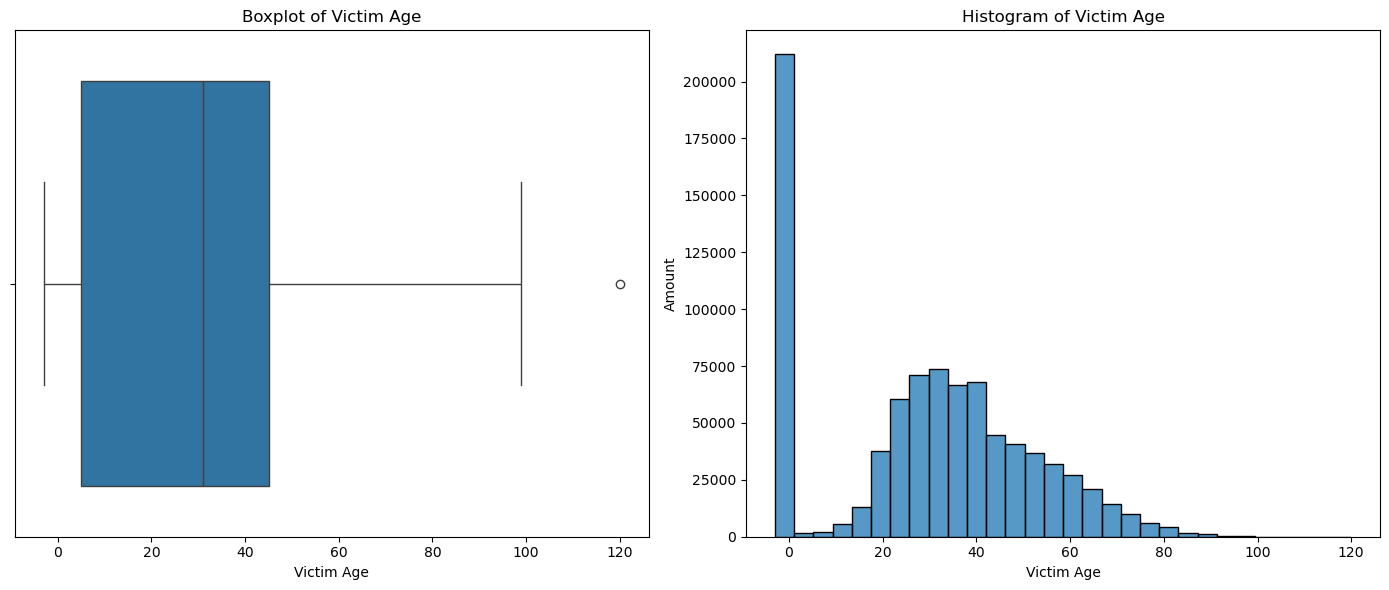

In [13]:
fig, axes = plt.subplots(1, 2, figsize=(14, 6))
sns.boxplot(ax=axes[0], x='victim_age', data= crime_data )
axes[0].set_title('Boxplot of Victim Age')
axes[0].set_xlabel('Victim Age')
axes[0].set_ylabel('')


sns.histplot(ax=axes[1], x='victim_age', data= crime_data , kde=False, bins=30)
axes[1].set_title('Histogram of Victim Age')
axes[1].set_xlabel('Victim Age')
axes[1].set_ylabel('Amount')


plt.tight_layout()
plt.show()

- we can see the huge amount of values ​​entered as 0. Probably instead of missing values entered 0.

- It can be seen that there are many values equal to 0 in the age column. We will not remove them because the rest of the data is valid, so we conclude that these are actual cases that indeed occurred.

## 2.  Creating relevant columns

In [17]:
crime_data.columns

Index(['division_number', 'date_reported', 'date_occurred', 'area',
       'area_name', 'reporting_district', 'part', 'crime_code',
       'crime_description', 'modus_operandi', 'victim_age', 'victim_sex',
       'victim_descent', 'premise_code', 'premise_description', 'weapon_code',
       'weapon_description', 'status', 'status_description', 'crime_code_1',
       'crime_code_2', 'crime_code_3', 'crime_code_4', 'location',
       'cross_street', 'latitude', 'longitude'],
      dtype='object')

##### 2.1 Convert columns to data time

In [19]:
crime_data ['date_occurred'] = pd.to_datetime(crime_data ['date_occurred'])
crime_data ['date_reported'] = pd.to_datetime(crime_data ['date_reported'])


##### 2.2 Creating a column by seasons

In [21]:
def get_season(month):
    if month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    elif month in [9, 10, 11]:
        return 'Fall'
    else:
        return 'Winter'
crime_data ['seasons_occurred'] = crime_data ['date_occurred'].dt.month.apply(get_season)

##### 2.3 Creating a column by day time

In [23]:
def categorize_time(datetime):
    hour = datetime.hour
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 16:
        return 'Noon'
    elif 16 <= hour < 18:
        return 'Afternoon'
    elif 18 <= hour < 22:
        return 'Evening'
    else:
        return 'Night'
crime_data['day_time'] = crime_data['date_occurred'].apply(categorize_time)

##### 2.4 Creating columns by hour,year and day name

In [25]:
crime_data['hour_occurred'] = crime_data['date_occurred'].dt.hour
crime_data['day_of_week'] = crime_data['date_occurred'].dt.day_name()
crime_data['year_occurred'] = crime_data['date_occurred'].dt.year

##### 2.5 Creating column by age description

In [27]:
def age_category(age):
        age = int(age)
        if age > 0 and age < 10:
            return "child"
        elif age >= 10 and age < 18:
            return "teenager"
        elif age >= 18 and age < 60:
            return "adult"
        elif age >= 60:
            return "old"
        else:    
            return "unknown"


crime_data["age_description"] = crime_data["victim_age"].apply(age_category)

##### 2.6 Creating a column to classify the type of weapon if any

In [29]:
def classify_weapon(weapon_description):
    firearm_keywords = ['PISTOL', 'REVOLVER', 'RIFLE', 'SHOTGUN', 'FIREARM', 'GUN', 'ASSAULT WEAPON', 'MAC', 'UZI', 'HECKLER & KOCH', 'EXPLOXIVE DEVICE', 'AUTOMATIC WEAPON', 'SEMI-AUTOMATIC', 'STARTER PISTOL', 'M1-1', 'M-14', 'BOMB', 'BOMB THREAT']
    sharp_keywords = ['KNIFE', 'SWORD', 'BLADE', 'SCISSORS', 'AXE', 'SCREWDRIVER', 'DIRK', 'DAGGER', 'CLEAVER', 'RAZOR', 'ICE PICK', 'BOWIE KNIFE', 'STRAIGHT RAZOR', 'OTHER CUTTING INSTRUMENT', 'UNKNOWN TYPE CUTTING INSTRUMENT']
    vehicle_keywords = ['VEHICLE']
    fire_bomb_keywords = ['FIRE', 'EXPLOXIVE DEVICE']
    threat_keywords = ['VERBAL THREAT', 'DEMAND NOTE', 'BOMB THREAT']
    improvised_keywords = ['ROCK', 'THROWN OBJECT', 'BLUNT INSTRUMENT', 'BOTTLE', 'CLUB', 'BAT', 'PIPE', 'STICK', 'HAMMER', 'GLASS', 'BRICK', 'BOARD', 'BELT', 'CHAIN', 'MARTIAL ARTS', 'CONCRETE BLOCK', 'SIMULATED GUN', 'MACE', 'PEPPER SPRAY', 'TOY GUN', 'SYRINGE', 'LIQUOR', 'DRUGS', 'FIXED OBJECT', 'BLACKJACK', 'RELIC FIREARM', 'AIR PISTOL', 'CAUSTIC CHEMICAL', 'POISON', 'BRASS KNUCKLES', 'TIRE IRON', 'DOG/ANIMAL (SIC ANIMAL ON)', 'SCALDING LIQUID', 'ROPE/LIGATURE', 'BOW AND ARROW']
    physical_keywords = ['STRONG-ARM', 'HANDS', 'FIST', 'FEET', 'BODILY FORCE', 'PHYSICAL PRESENCE']
    
    if pd.isna(weapon_description):
         if pd.isna(weapon_description):
            return np.nan
    
    if 'UNKNOWN WEAPON' in weapon_description or 'OTHER WEAPON' in weapon_description:
        return 'Unknown Weapon'
    if any(keyword in weapon_description for keyword in firearm_keywords):
        return 'firearm'
    elif any(keyword in weapon_description for keyword in sharp_keywords):
        return 'sharp weapon'
    elif any(keyword in weapon_description for keyword in vehicle_keywords):
        return 'vehicles'
    elif any(keyword in weapon_description for keyword in fire_bomb_keywords):
        return 'fire and bombs'
    elif any(keyword in weapon_description for keyword in threat_keywords):
        return 'threats'
    elif any(keyword in weapon_description for keyword in improvised_keywords):
        return 'improvised weapon'
    elif any(keyword in weapon_description for keyword in physical_keywords):
        return 'Physical strength'
    else:
        return 'OTHER'


crime_data['weapon_category'] = crime_data['weapon_description'].apply(classify_weapon)

In [30]:
crime_data.dtypes

division_number                 int64
date_reported          datetime64[ns]
date_occurred          datetime64[ns]
area                            int64
area_name                      object
reporting_district              int64
part                            int64
crime_code                      int64
crime_description              object
modus_operandi                 object
victim_age                      int64
victim_sex                     object
victim_descent                 object
premise_code                  float64
premise_description            object
weapon_code                   float64
weapon_description             object
status                         object
status_description             object
crime_code_1                  float64
crime_code_2                  float64
crime_code_3                  float64
crime_code_4                  float64
location                       object
cross_street                   object
latitude                      float64
longitude   

In [31]:
crime_data.head()

,division_number,date_reported,date_occurred,area,area_name,reporting_district,part,crime_code,crime_description,modus_operandi,...,cross_street,latitude,longitude,seasons_occurred,day_time,hour_occurred,day_of_week,year_occurred,age_description,weapon_category
0,10304468,2020-01-08,2020-01-08 22:30:00,3,Southwest,377,2,624,BATTERY - SIMPLE ASSAULT,0444 0913,...,NaN,34.0141,-118.2978,Winter,Night,22,Wednesday,2020,adult,Physical strength
1,190101086,2020-01-02,2020-01-01 03:30:00,1,Central,163,2,624,BATTERY - SIMPLE ASSAULT,0416 1822 1414,...,NaN,34.0459,-118.2545,Winter,Night,3,Wednesday,2020,adult,Unknown Weapon
2,200110444,2020-04-14,2020-02-13 12:00:00,1,Central,155,2,845,SEX OFFENDER REGISTRANT OUT OF COMPLIANCE,1501,...,NaN,34.0448,-118.2474,Winter,Noon,12,Thursday,2020,unknown,NaN
3,191501505,2020-01-01,2020-01-01 17:30:00,15,N Hollywood,1543,2,745,VANDALISM - MISDEAMEANOR ($399 OR UNDER),0329 1402,...,NaN,34.1685,-118.4019,Winter,Afternoon,17,Wednesday,2020,old,NaN
4,191921269,2020-01-01,2020-01-01 04:15:00,19,Mission,1998,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,...,NaN,34.2198,-118.4468,Winter,Night,4,Wednesday,2020,adult,NaN




<h2 style="color: black;">3. Identity Thieves In Hollonback</h2> 




<div style="text-align:center;">
    <img src= "https://github.com/BareLevi/Project_Ella_Tomer_Barel/blob/main/identity-theft-image.png?raw=true
" alt="תיאור התמונה" style="width: 30%;">
</div>

##### 3.1 The age distribution of the victims

In [35]:
identity_theft = crime_data[crime_data["crime_description"] == "THEFT OF IDENTITY"]

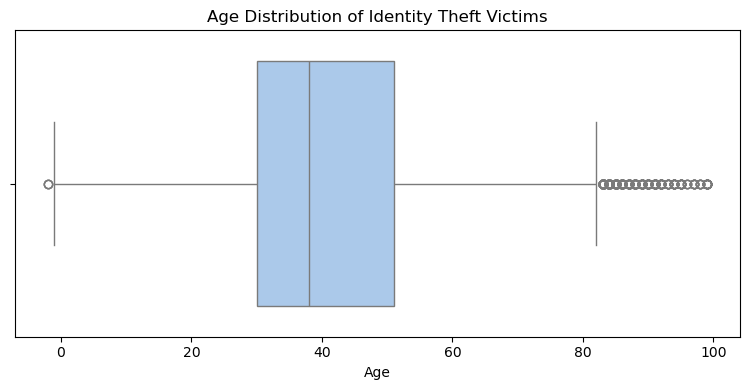

In [36]:
plt.figure(figsize=(15,4))


plt.subplot(1, 2, 1)
sns.boxplot(data=identity_theft, x='victim_age', palette='pastel')
plt.title('Age Distribution of Identity Theft Victims')
plt.xlabel('Age')
plt.tight_layout()
plt.show()

In [37]:
identity_theft_age0 = identity_theft[identity_theft['victim_age'] <= 0]
len(identity_theft_age0)



992

- There are about 992 entries where the age is 0 or less. We choose to leave them because these cases occurred, assuming complainants chose to remain anonymous or there was a mistake in entering the data

##### 3.2 Analyzing the crime areas where identity theft crimes happend


In [40]:
idt_by_area = identity_theft['area_name'].value_counts().reset_index()
idt_by_area.columns = ["area_name","amount"]
idt_by_area.head()


,area_name,amount
0,77th Street,3849
1,Southeast,3431
2,Southwest,3323
3,Devonshire,2926
4,West LA,2902


##### 3.3 Analyzing the crime places where identity theft crimes happend

In [42]:
place_counts = identity_theft['premise_description'].value_counts().reset_index()
place_counts.columns = ['place', 'count']
place_counts.head()


,place,count
0,SINGLE FAMILY DWELLING,26250
1,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",12915
2,BANK,2452
3,AUTOMATED TELLER MACHINE (ATM),2205
4,CYBERSPACE,1592


##### 3.4 Classifying places involved with money and check in which areas these places are most common for identity theft

In [44]:
selected_premises = [
    "BANK DROP BOX/MONEY DROP-OUTSIDE OF BANK",
    "DRIVE THRU BANKING (WINDOW)",
    "BANKING INSIDE MARKET-STORE",
    "CHECK CASHING",
    "SAVINGS & LOAN",
    "FINANCE COMPANY",
    "CREDIT UNION",
    "AUTOMATED TELLER MACHINE (ATM)",
    "BANK"
]

idt = identity_theft[identity_theft['premise_description'].isin(selected_premises)]
idt_area_name = idt['area_name'].value_counts().reset_index()
idt_area_name.columns = ['area_name', 'amount']


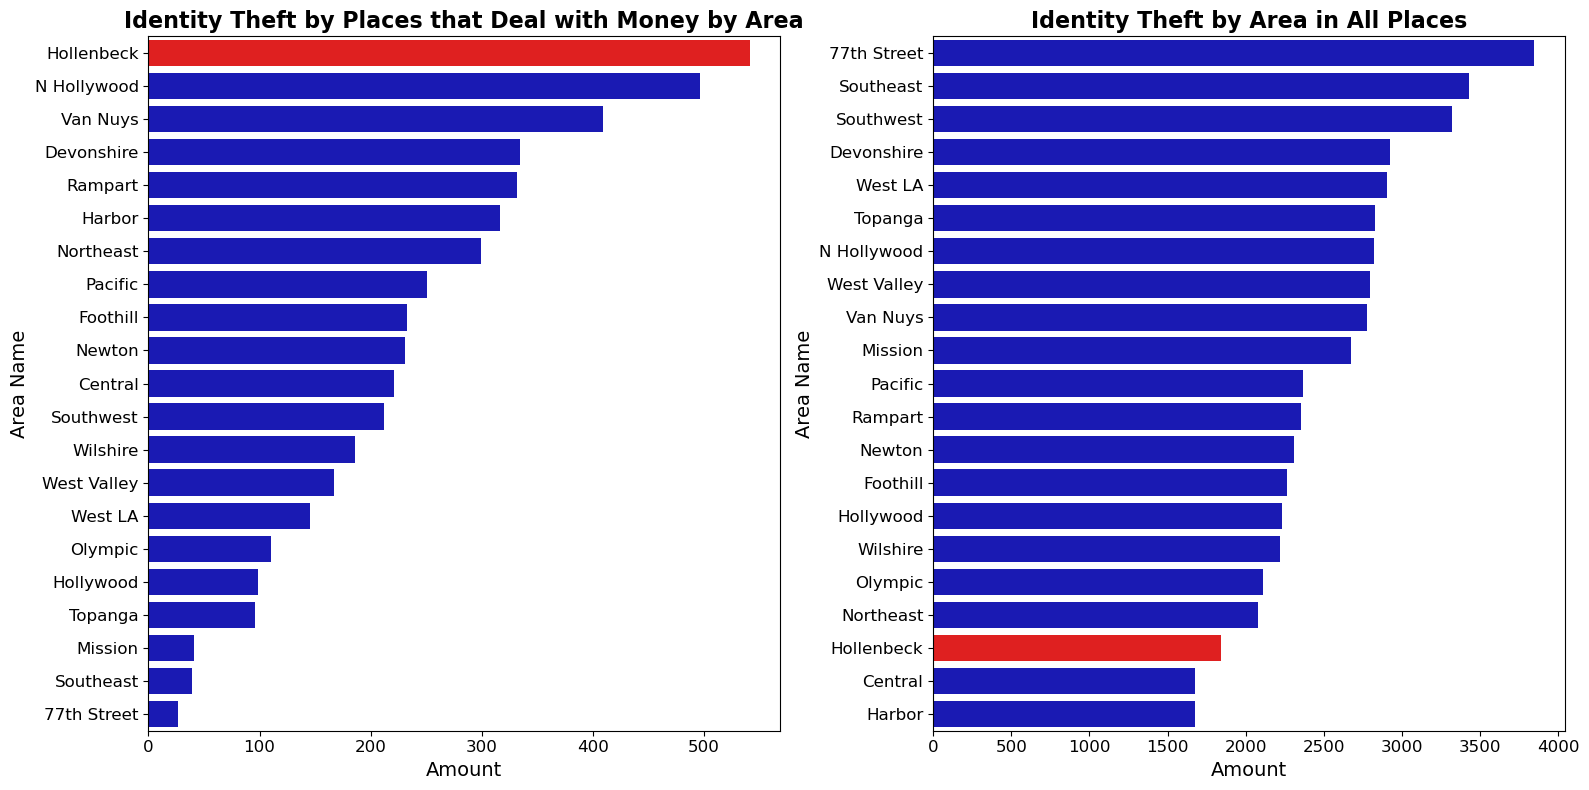

In [45]:
colors_area_name = ['#ff0000' if area == 'Hollenbeck' else '#0000cd' for area in idt_area_name['area_name']]
colors_by_area = ['#ff0000' if area == 'Hollenbeck' else '#0000cd' for area in idt_by_area['area_name']]


fig, axs = plt.subplots(1, 2, figsize=(16, 8))


sns.barplot(data=idt_area_name, x='amount', y='area_name', ax=axs[0], palette=colors_area_name)
axs[0].set_title('Identity Theft by Places that Deal with Money by Area', fontsize=16, weight='bold')
axs[0].set_xlabel('Amount', fontsize=14)
axs[0].set_ylabel('Area Name', fontsize=14)
axs[0].tick_params(axis='x', labelsize=12)
axs[0].tick_params(axis='y', labelsize=12)


sns.barplot(data=idt_by_area, x='amount', y='area_name', ax=axs[1], palette=colors_by_area)
axs[1].set_title('Identity Theft by Area in All Places', fontsize=16, weight='bold')
axs[1].set_xlabel('Amount', fontsize=14)
axs[1].set_ylabel('Area Name', fontsize=14)
axs[1].tick_params(axis='x', labelsize=12)
axs[1].tick_params(axis='y', labelsize=12)


plt.tight_layout()


plt.show()

- Hollonback is the area that ranks third from last overall in crime, but ranks first in crimes related to money

##### 3.5 Analyzing which population suffers the most from identity theft in places primarily concerned with money in the Hollonback area

In [48]:
idt_Hollenbeck = identity_theft[(identity_theft['premise_description'].isin(selected_premises)) & (identity_theft['area_name'] == 'Hollenbeck')]
idt_Hollenbeck_by_descent = idt_Hollenbeck['victim_descent'].value_counts().reset_index()
idt_Hollenbeck_by_descent.columns = ['victim_descent', 'amount']


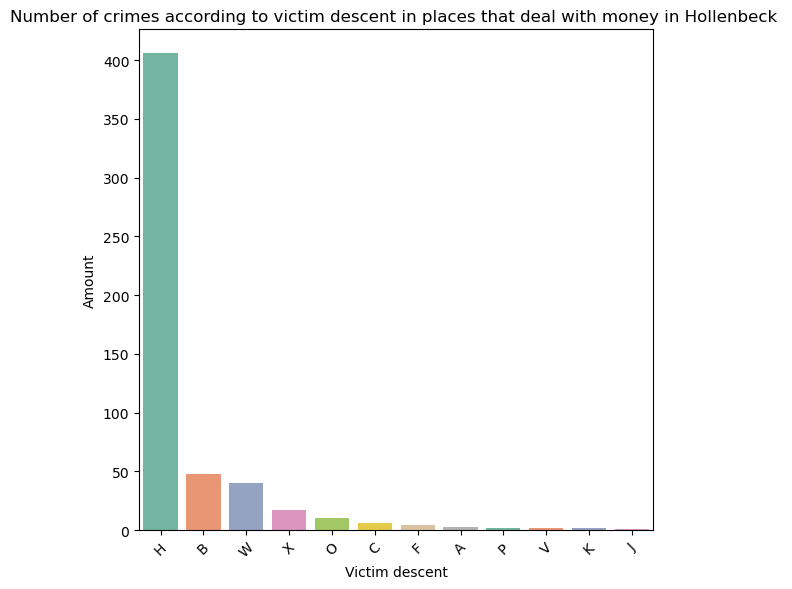

In [49]:
custom_palette = sns.color_palette("Set2")

fig, ax = plt.subplots(figsize=(6, 6))


sns.barplot(x='victim_descent', y='amount', data=idt_Hollenbeck_by_descent, palette=custom_palette, ax=ax)

ax.set_title("Number of crimes according to victim descent in places that deal with money in Hollenbeck ")
ax.set_xlabel("Victim descent")
ax.set_ylabel("Amount")
ax.set_xticklabels(ax.get_xticklabels(), rotation=45)

plt.tight_layout()
plt.show()

- It can be seen that Hispanics suffer the most from identity theft in areas where their primary occupation is related to money

In [51]:
idt_Hollenbeck['category'] = idt_Hollenbeck['victim_descent'].apply(lambda x: 'H' if x == 'H' else 'Everything Else')
idt_Hollenbeck_by_descent = idt_Hollenbeck['category'].value_counts().reset_index()
idt_Hollenbeck_by_descent.columns = ['victim_descent', 'amount']


In [52]:
idt_in_all_places_by_descent = identity_theft["victim_descent"].value_counts().reset_index()
idt_in_all_places_by_descent.columns = ["victim_descent", "amount"]
identity_theft['category'] = identity_theft['victim_descent'].apply(lambda x: 'H' if x == 'H' else 'Everything Else')

idt_in_all_places_by_descent = identity_theft['category'].value_counts().reset_index()
idt_in_all_places_by_descent.columns = ["victim_descent", "amount"]



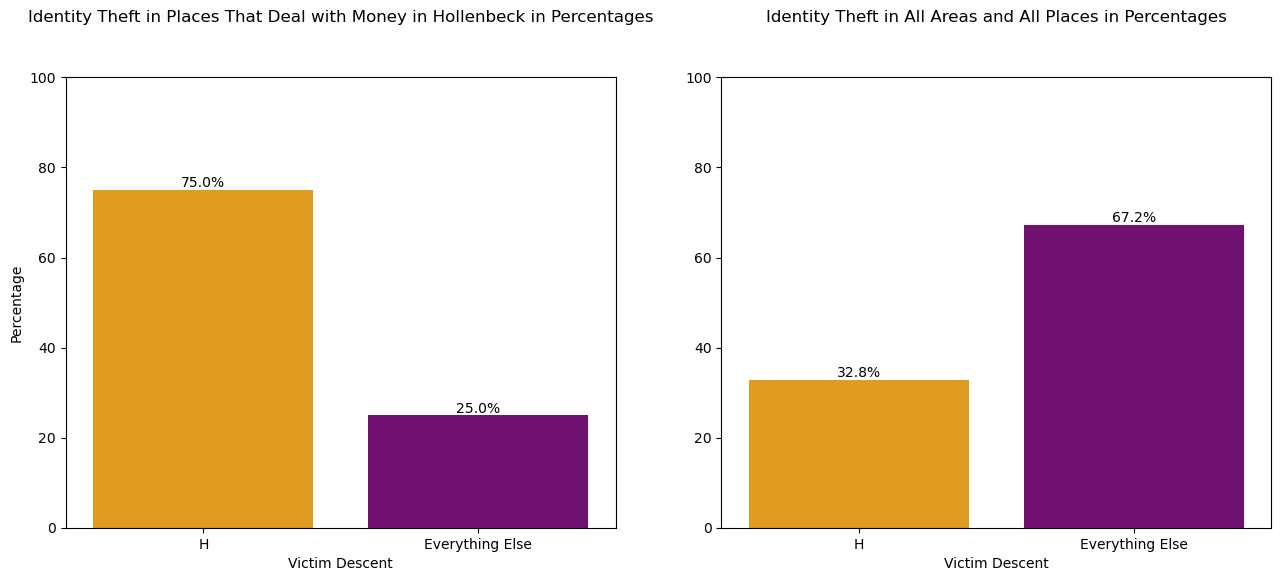

In [53]:
idt_Hollenbeck_by_descent['amount'] = (idt_Hollenbeck_by_descent['amount'] / idt_Hollenbeck_by_descent['amount'].sum()) * 100
idt_in_all_places_by_descent['amount'] = (idt_in_all_places_by_descent['amount'] / idt_in_all_places_by_descent['amount'].sum()) * 100


idt_in_all_places_by_descent = idt_in_all_places_by_descent.sort_values(by='victim_descent', ascending=False)


fig, axes = plt.subplots(1, 2, figsize=(14, 7))


colors_hollenbeck = ['orange' if descent == 'H' else 'purple' for descent in idt_Hollenbeck_by_descent['victim_descent']]
colors_all_places = ['orange' if descent == 'H' else 'purple' for descent in idt_in_all_places_by_descent['victim_descent']]


sns.barplot(x='victim_descent', y='amount', data=idt_Hollenbeck_by_descent, palette=colors_hollenbeck, ax=axes[0])
axes[0].set_title('Identity Theft in Places That Deal with Money in Hollenbeck in Percentages', pad=40)
axes[0].set_xlabel('Victim Descent')
axes[0].set_ylabel('Percentage')
axes[0].set_ylim(0, 100)


for p in axes[0].patches:
    height = p.get_height()
    axes[0].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


sns.barplot(x='victim_descent', y='amount', data=idt_in_all_places_by_descent, palette=colors_all_places, ax=axes[1])
axes[1].set_title('Identity Theft in All Areas and All Places in Percentages', pad=40)
axes[1].set_xlabel('Victim Descent')
axes[1].set_ylabel('')
axes[1].set_ylim(0, 100)


for p in axes[1].patches:
    height = p.get_height()
    axes[1].annotate(f'{height:.1f}%', (p.get_x() + p.get_width() / 2., height), ha='center', va='center', fontsize=10, color='black', xytext=(0, 5), textcoords='offset points')


plt.tight_layout(pad=5.0)
plt.show()

<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
   First Conclusion
</div>


#### Based on data from the Public Policy Institute of California, Hispanics make up 50.7% of the poor in California. Analysis of the data suggests that, due to being a disadvantaged and impoverished population. We can assum that Hispanics are an easy target for identity theft in Hollenbeck, especially near financial locations such as banks and ATMs. 

## 4. Burglaries Of Elderly Properties

##### 4.1 Analyzing the crimes committed against elders

In [58]:
old_df = crime_data[crime_data["age_description"]== "old"]

old_df_crime_description = old_df['crime_description'].value_counts().reset_index()
old_df_crime_description.columns = ['crime_description', 'count']

old_df_crime_description.head()


,crime_description,count
0,BATTERY - SIMPLE ASSAULT,9901
1,BURGLARY,8426
2,THEFT OF IDENTITY,7226
3,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",5190
4,THEFT PLAIN - PETTY ($950 & UNDER),5010


##### 4.2 analysis of the places where the burglaries against the elders took place

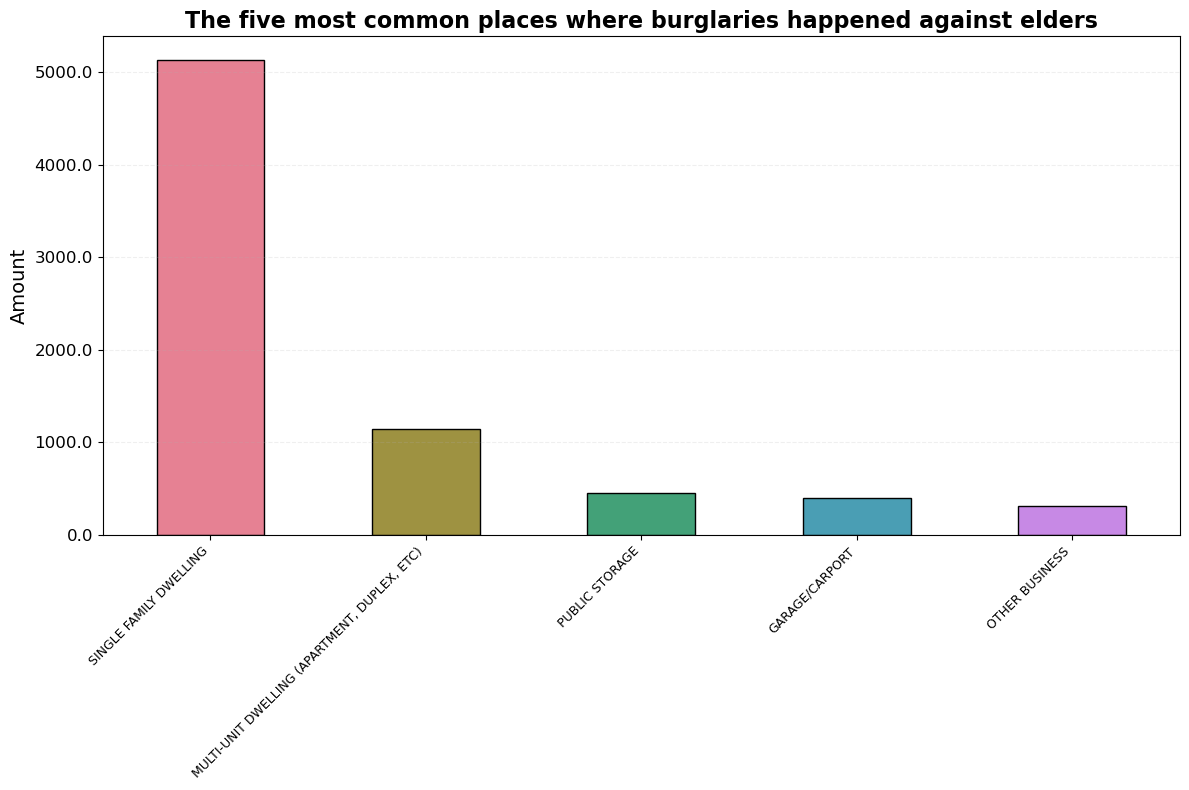

In [60]:
old_burglary_df = old_df[old_df["crime_description"] == "BURGLARY"]
premise_description_counts = old_burglary_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
top_5_premise_descriptions = premise_description_counts.head(5)  # Get the top 5


fig, ax = plt.subplots(figsize=(12, 8))


palette = sns.color_palette("husl", len(top_5_premise_descriptions)) 
sns.barplot(x='premise_description', y='count', data=top_5_premise_descriptions, palette=palette, edgecolor='black', ax=ax, width=0.5)


ax.set_xlabel('')
ax.set_ylabel('Amount', fontsize=14)
ax.set_title('The five most common places where burglaries happened against elders', fontsize=16, fontweight='bold')


ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=9)  


ax.set_yticklabels(ax.get_yticks(), fontsize=12)


ax.grid(axis='y', linestyle='--', alpha=0.2)


plt.tight_layout()


plt.show()

- we can see that the most burglaries occurred in the homes of elderly, however quite a few cases happened in shops and businesses

##### 4.3 Checking if there's a trend of increase or decrease in cases over the years

In [63]:
old_burglary_df['year_occurred'] = old_burglary_df['date_occurred'].dt.year
yearly_counts_old_burglary_df = old_burglary_df['year_occurred'].value_counts().reset_index()
yearly_counts_old_burglary_df.columns = ['year', 'amount_burglaries']
yearly_counts_old_burglary_df


,year,amount_burglaries
0,2023,2393
1,2022,2271
2,2021,1899
3,2020,1863


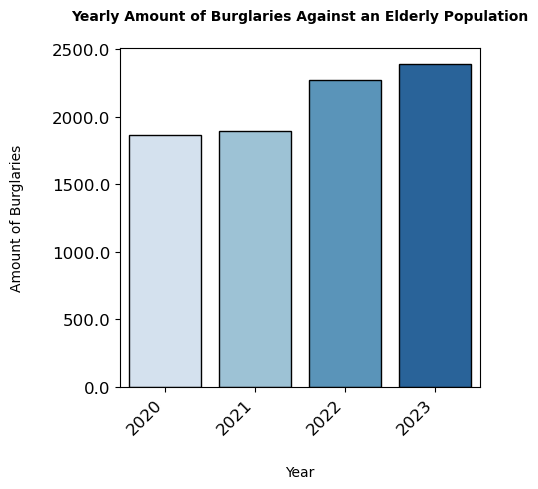

In [64]:
yearly_counts_old_burglary_df['year'] = yearly_counts_old_burglary_df['year'].astype(int)


fig, ax = plt.subplots(figsize=(5,5))


sns.barplot(x='year', y='amount_burglaries', data=yearly_counts_old_burglary_df, palette="Blues", edgecolor='black', ax=ax)


ax.set_xlabel('Year', fontsize=10, labelpad=20)
ax.set_ylabel('Amount of Burglaries', fontsize=10, labelpad=20)
ax.set_title('Yearly Amount of Burglaries Against an Elderly Population', fontsize=10, fontweight='bold', pad=20)
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', fontsize=12)
ax.set_yticklabels(ax.get_yticks(), fontsize=12)


ax.yaxis.get_major_locator().set_params(integer=True)


plt.tight_layout()
plt.show()

- There has been an increase over the years in the number of burglaries targeting the elderly population

##### 4.4 Trying to understand the number of perpetrators involved in burglaries

In [67]:
status_description_counts = old_burglary_df['status_description'].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']


In [68]:
invest_cont_count = status_description_counts[status_description_counts['status_description'] == "Invest Cont"]['count'].sum()
other_count = status_description_counts['count'].sum() - invest_cont_count

status_description_simplified = pd.DataFrame({
    'status_description': ['Invest Cont', 'The criminal was punished'],
    'count': [invest_cont_count, other_count]
})


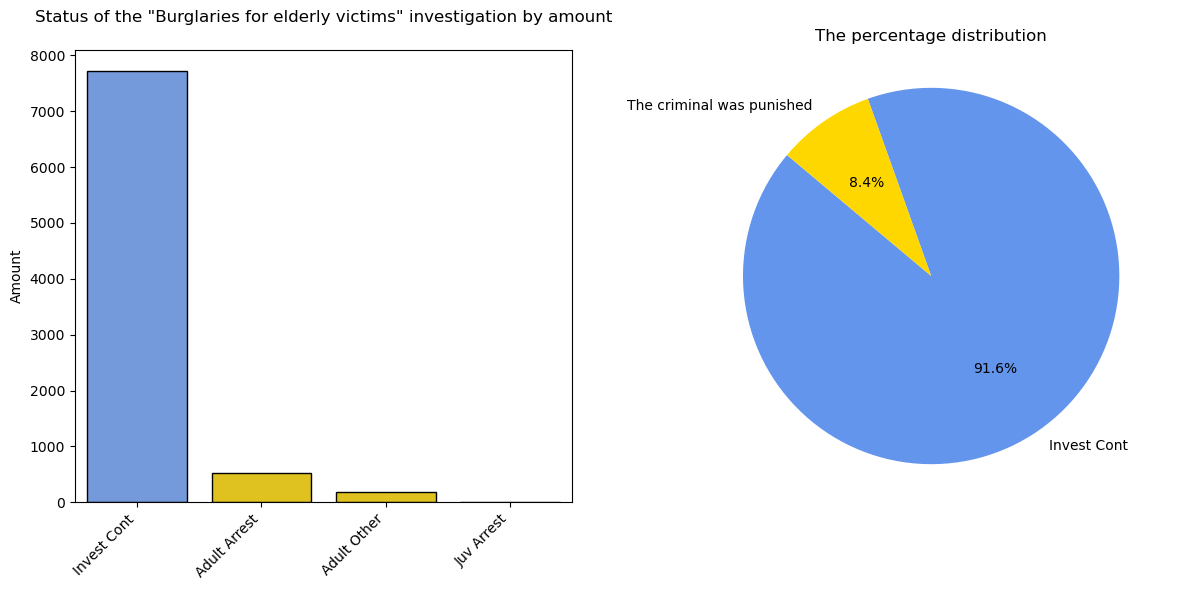

In [69]:
blue = "#6495ED"
yellow = "#FFD700"


bar_colors = [blue if status == "Invest Cont" else yellow for status in status_description_counts['status_description']]


fig, axes = plt.subplots(1, 2, figsize=(12, 6))


axes[1].pie(status_description_simplified['count'], labels=status_description_simplified['status_description'], autopct='%1.1f%%', colors=[blue, yellow], startangle=140)
axes[1].set_title('The percentage distribution')
axes[1].axis('equal')


sns.barplot(x='status_description', y='count', data=status_description_counts, palette=bar_colors, edgecolor='black', ax=axes[0])


axes[0].set_xlabel('')
axes[0].set_ylabel('Amount')
axes[0].set_title('Status of the "Burglaries for elderly victims" investigation by amount', fontsize=12, pad=20)
axes[0].set_xticklabels(axes[0].get_xticklabels(), rotation=45, ha='right')


plt.tight_layout()
plt.show()

- According to the graphs, nearly all reported cases of burglaries involve elderly individuals, with investigations remaining open, indicating that most burglars are not apprehended

##### 4.5  Checking if there is a trend of increase or decrease in the number of criminals punished over the years

In [72]:
status_description_yearly_counts = old_burglary_df.groupby(['year_occurred', 'status_description']).size().reset_index(name='count')


pivot_table = status_description_yearly_counts.pivot(index='year_occurred', columns='status_description', values='count').fillna(0)


pivot_table

status_description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest
year_occurred,,,,
2020,147.0,69.0,1646.0,1.0
2021,146.0,38.0,1715.0,0.0
2022,132.0,45.0,2092.0,2.0
2023,96.0,33.0,2263.0,1.0


In [73]:
required_columns = ['Adult Arrest', 'Adult Other', 'Juv Arrest']
for col in required_columns:
    if col not in pivot_table.columns:
        pivot_table[col] = 0


result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)

result_df.columns = ['Year', 'Invest Cont', 'criminals_punished']


In [74]:
result_df = pivot_table.reset_index()
result_df['The criminal was punished'] = result_df[required_columns].sum(axis=1)
result_df = result_df[['year_occurred', 'Invest Cont', 'The criminal was punished']]


result_df = result_df.fillna(0)
result_df.columns = ['year', 'Invest Cont', 'criminals_punished']
result_df

,year,Invest Cont,criminals_punished
0,2020,1646.0,217.0
1,2021,1715.0,184.0
2,2022,2092.0,179.0
3,2023,2263.0,130.0


In [75]:
result_subset = result_df[['criminals_punished', 'year']]
yearly_counts_subset = yearly_counts_old_burglary_df[['amount_burglaries', 'year']]


final_df = pd.merge(result_subset, yearly_counts_subset, on='year')


final_df = final_df[['year', 'amount_burglaries', 'criminals_punished']]



##### 4.6 Checking the correlation between the increase in the number of burglaries and the decrease in the number of burglars caught in recent years

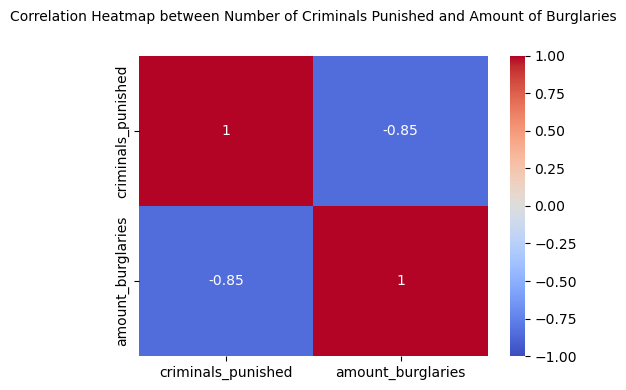

In [77]:
correlation_data = final_df[['criminals_punished', 'amount_burglaries']]
correlation_matrix = correlation_data.corr()


fig, ax = plt.subplots(figsize=(5, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, cbar_kws={'label': ''}, ax=ax)


ax.set_title('Correlation Heatmap between Number of Criminals Punished and Amount of Burglaries', fontsize=10, pad=25)
plt.tight_layout()
plt.show()





- Based on correlation data, it can be inferred that there is a trend where as the number of prosecuted offenders decreases, the number of burglaries increases. This correlation, estimated at -0.85, indicates a strong negative relationship between the two phenomena

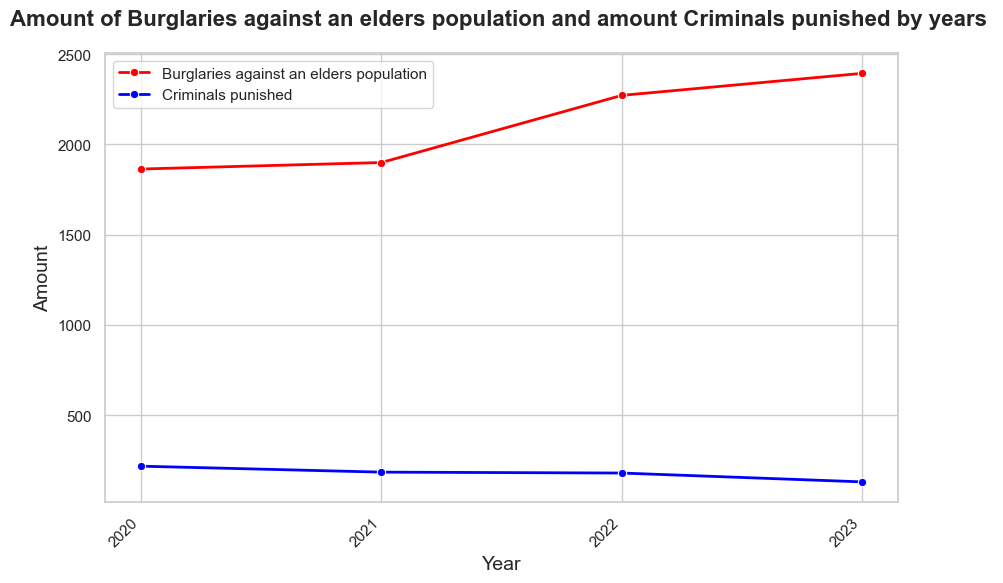

In [79]:
sns.set_theme(style="whitegrid")


final_df['year'] = final_df['year'].astype(int)
result_df['year'] = result_df['year'].astype(int)


plt.subplots(figsize=(9,6))


sns.lineplot(x='year', y='amount_burglaries', data=final_df, color='red', marker='o', linestyle='-', linewidth=2, markersize=6, label='Burglaries against an elders population')
sns.lineplot(x='year', y='criminals_punished', data=result_df, color='blue', marker='o', linestyle='-', linewidth=2, markersize=6, label='Criminals punished')
plt.xlabel('Year', fontsize=14)
plt.ylabel('Amount', fontsize=14)
plt.title('Amount of Burglaries against an elders population and amount Criminals punished by years ', fontsize=16, fontweight='bold', pad=20)
plt.xticks(rotation=45, ha='right')
plt.gca().xaxis.set_major_locator(plt.MaxNLocator(integer=True))
plt.grid(True)
plt.legend(loc='upper left', bbox_to_anchor=(2,2), prop={'size': 6})
plt.legend()
plt.tight_layout()
plt.show()


<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
    Second Conclusion
</div>


#### The police are not effective in protecting the elderly population from burglaries of homes, properties, and businesses,  - both in preventing and eradicating the phenomenon, as well as in handling existing cases


<div style="text-align:center;">
    <img src="https://github.com/BareLevi/Project_Ella_Tomer_Barel/blob/main/a_boy_are_arrested.jpg?raw=true" alt="תיאור התמונה" style="width: 30%;">
</div>

## 5. Pickpocket In Los Angeles

##### 5.1 Analysis of the areas where pickpocket crimes happened

In [85]:
pickpocket_df = crime_data[crime_data["crime_description"] == "PICKPOCKET"]



In [86]:
pickpocket_area_name_counts = pickpocket_df['area_name'].value_counts().reset_index()
pickpocket_area_name_counts.columns = ['area_name', 'count']
pickpocket_area_name_counts.head()

,area_name,count
0,Central,539
1,Hollywood,510
2,Southwest,264
3,Wilshire,185
4,Olympic,154


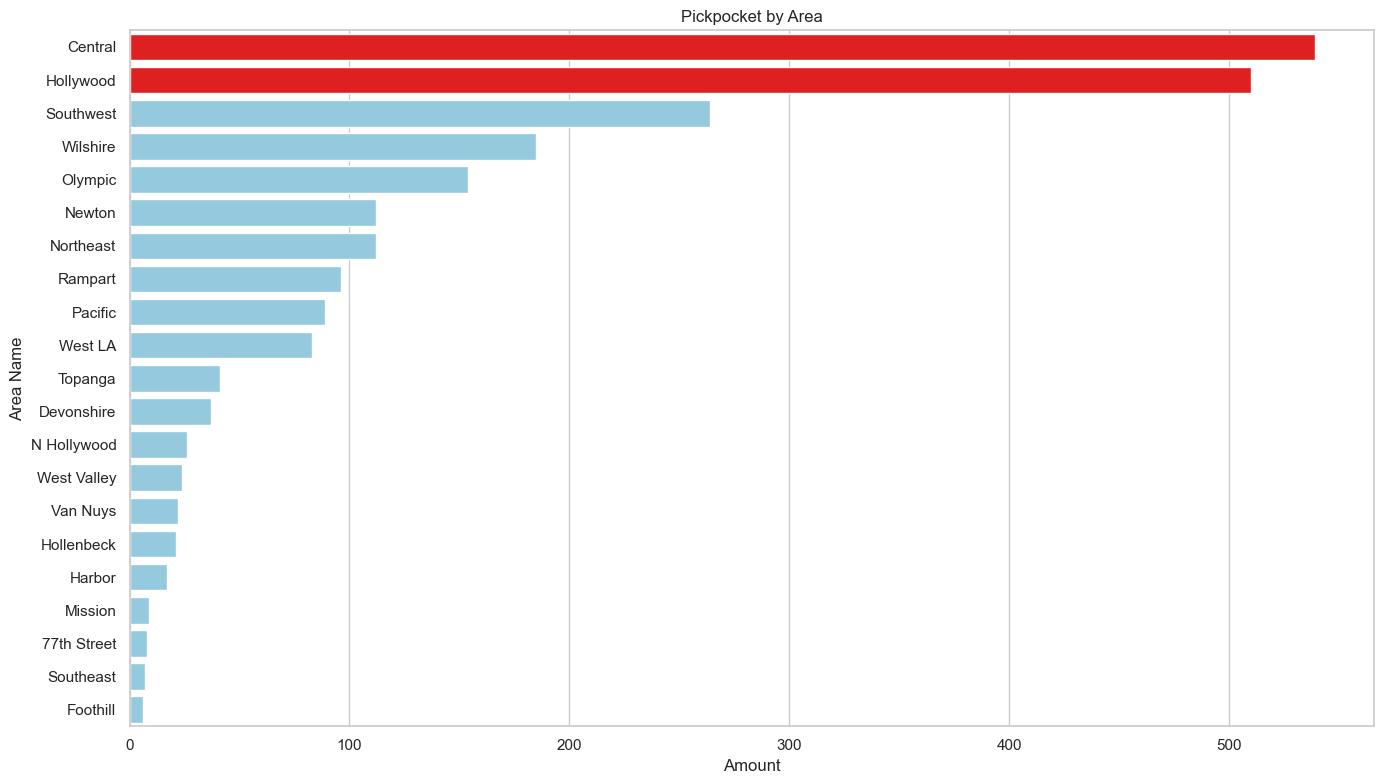

In [87]:
colors = ['red' if area in ['Central', 'Hollywood'] else 'skyblue' for area in pickpocket_area_name_counts['area_name']]

plt.figure(figsize=(14, 8))
sns.barplot(x='count', y='area_name', data=pickpocket_area_name_counts, palette=colors)

plt.title('Pickpocket by Area')
plt.xlabel('Amount')
plt.ylabel('Area Name')
plt.tight_layout()

plt.show()

- The majority of pickpocketing incidents occur in Hollywood and Central

##### 5.2 Analysis of pickpocket hours

In [90]:
CentralANDHollywood_df = pickpocket_df[pickpocket_df['area_name'].isin(['Central', 'Hollywood'])]
hour_counts_ch = CentralANDHollywood_df['hour_occurred'].value_counts().reset_index()
hour_counts_ch.columns = ['hour_occurred', 'count']

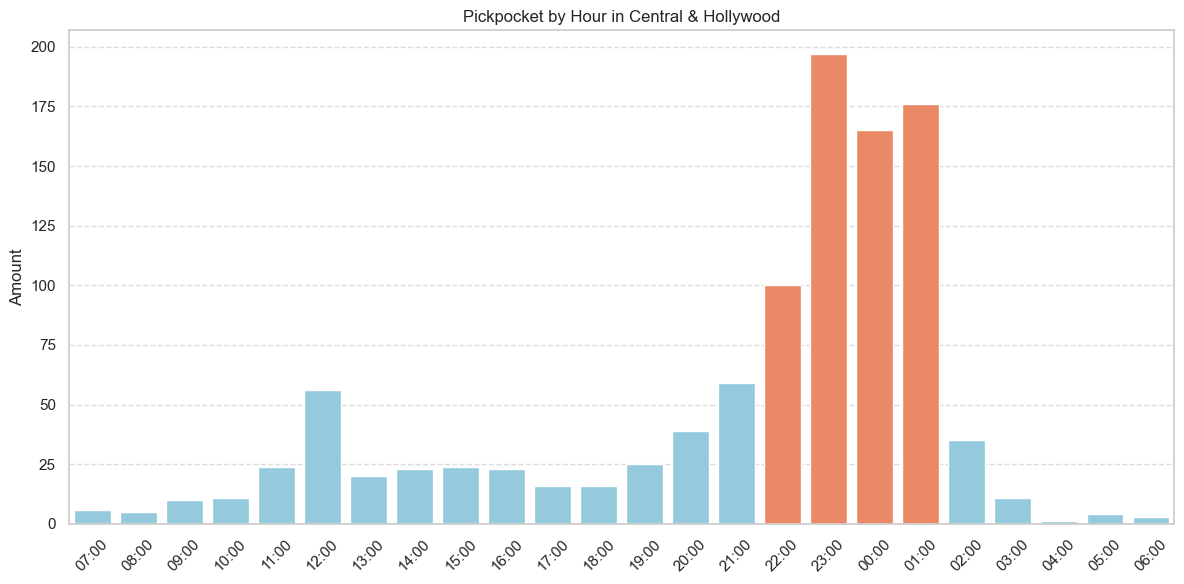

In [91]:
custom_order = list(range(7, 24)) + list(range(0, 7))


hour_counts_ch['hour_occurred'] = pd.Categorical(hour_counts_ch['hour_occurred'], categories=custom_order, ordered=True)
hour_counts_ch = hour_counts_ch.sort_values('hour_occurred').reset_index(drop=True)


colors = ['coral' if (hour >= 22 or hour <= 1) else 'skyblue' for hour in custom_order]


fig, ax = plt.subplots(figsize=(12, 6))

sns.barplot(x=hour_counts_ch['hour_occurred'].astype(str), y=hour_counts_ch['count'], palette=colors, ax=ax)


hour_labels = [f'{hour:02d}:00' for hour in custom_order]


ax.set_xticks(range(len(custom_order)))
ax.set_xticklabels(hour_labels, rotation=45)

ax.set_xlabel('')
ax.set_ylabel('Amount')
ax.set_title('Pickpocket by Hour in Central & Hollywood')
ax.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

- Pickpockets operate primarily during the evening and nighttime hours

##### 5.3 Analysis of pickpocket days

In [94]:
day_of_week_counts = CentralANDHollywood_df['day_of_week'].value_counts().reset_index()
day_of_week_counts.columns = ['day_of_week', 'count']
day_of_week_counts

,day_of_week,count
0,Saturday,406
1,Sunday,241
2,Friday,221
3,Thursday,72
4,Monday,42
5,Tuesday,38
6,Wednesday,29


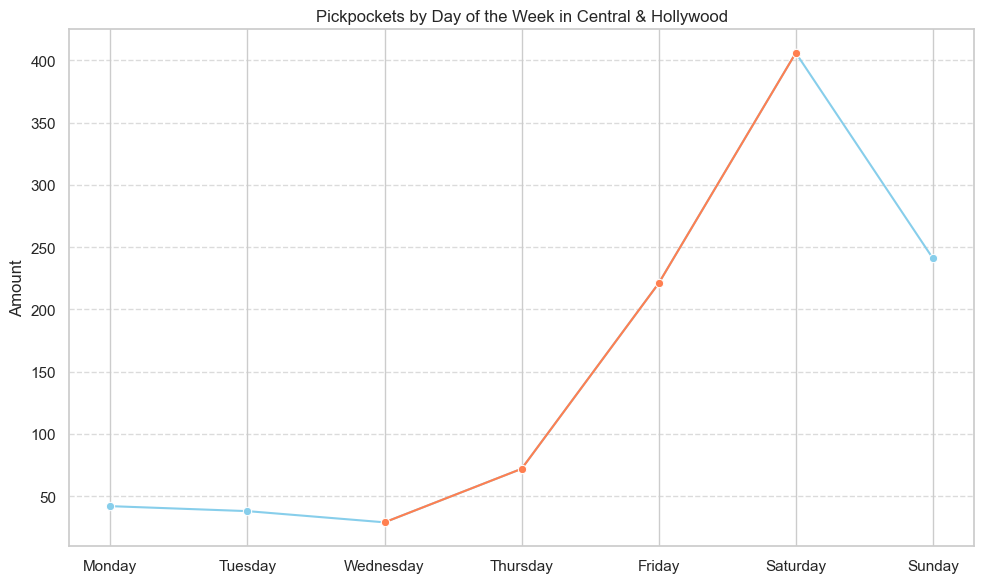

In [95]:
if 'day_of_week' not in CentralANDHollywood_df.columns:
    CentralANDHollywood_df['day_of_week'] = CentralANDHollywood_df['date_occurred'].dt.day_name()

custom_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

day_of_week_counts['day_of_week'] = pd.Categorical(day_of_week_counts['day_of_week'], categories=custom_order, ordered=True)
day_of_week_counts = day_of_week_counts.sort_values('day_of_week').reset_index(drop=True)


highlight_days = ['Wednesday', 'Thursday', 'Friday', 'Saturday']
colors = ['coral' if day in highlight_days else 'skyblue' for day in day_of_week_counts['day_of_week']]


plt.figure(figsize=(10,6))


sns.lineplot(x='day_of_week', y='count', data=day_of_week_counts, marker='o', color='skyblue')


sns.lineplot(x='day_of_week', y='count', data=day_of_week_counts[day_of_week_counts['day_of_week'].isin(highlight_days)], marker='o', color='coral')

plt.title('Pickpockets by Day of the Week in Central & Hollywood')
plt.xlabel('')
plt.ylabel('Amount')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()


plt.show()

- There is a sharp increase in pickpocketing incidents towards the weekend compared to other weekdays

##### 5.4  Analysis of the  pickpocket locations


In [98]:
premise_description_counts = CentralANDHollywood_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']


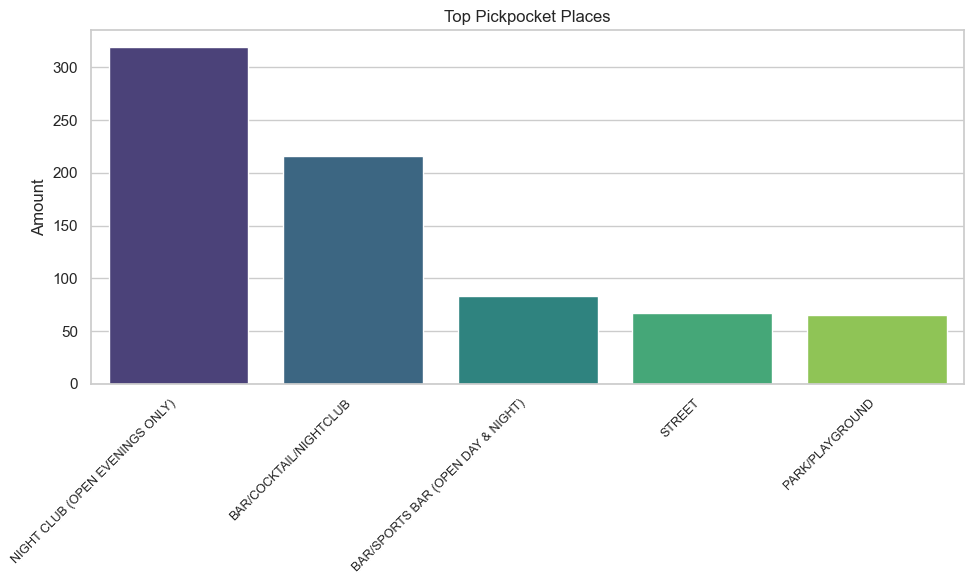

In [99]:
top_5_premise_description_counts = premise_description_counts.head(5)


plt.figure(figsize=(10, 6))
sns.barplot(x='premise_description', y='count', data=top_5_premise_description_counts, palette='viridis')

plt.title('Top Pickpocket Places')
plt.xlabel('')
plt.ylabel('Amount')
plt.xticks(rotation=45,ha = "right", fontsize=9)
plt.tight_layout()


plt.show()

- The leading locations for pickpocketing are entertainment venues

<div style="text-align:left;">
    <img src="https://github.com/BareLevi/Project_Ella_Tomer_Barel/blob/main/club_image.jpg?raw=true" alt="תיאור התמונה" style="width: 40%;">
</div>

##### 5.5  Creating a new column that will help us understand how many cases occurred at entertainment venues

In [103]:
hang_out_places = [
    'STAPLES CENTER *', 'BAR/COCKTAIL/NIGHTCLUB',
    'SHOPPING MALL (COMMON AREA)', 'DISCOUNT STORE (99 CENT,DOLLAR,ETC.',
    'BEACH', 'BAR/SPORTS BAR (OPEN DAY & NIGHT)', 'RESTAURANT/FAST FOOD',
    'COLISEUM', 'MINI-MART', 'NIGHT CLUB (OPEN EVENINGS ONLY)', 'THE GROVE',
    'CLOTHING STORE', 'CONVENTION CENTER', 'DEPARTMENT STORE',
    "COFFEE SHOP (STARBUCKS, COFFEE BEAN, PEET'S, ETC.)", 'LIQUOR STORE',
    'SPORTS VENUE, OTHER', 'THEATRE/MOVIE', 'SPORTS ARENA',
    'ENTERTAINMENT/COMEDY CLUB (OTHER)', 'MEMBERSHIP STORE (COSTCO,SAMS CLUB)*',
    "DIY CENTER (LOWE'S,HOME DEPOT,OSH,CONTRACTORS WAREHOUSE)", 'THE BEVERLY CONNECTION',
    'DODGER STADIUM', 'HOTEL', '*', 'MUSEUM', 'AMUSEMENT PARK*',
    'YARD (RESIDENTIAL/BUSINESS)', 'MASS GATHERING LOCATION',
    "SEX ORIENTED/BOOK STORE/STRIP CLUB/GENTLEMAN'S CLUB", 'OPTICAL OFFICE INSIDE STORE OR SUPERMARKET*'
]


CentralANDHollywood_df['hang-out place'] = CentralANDHollywood_df['premise_description'].isin(hang_out_places)

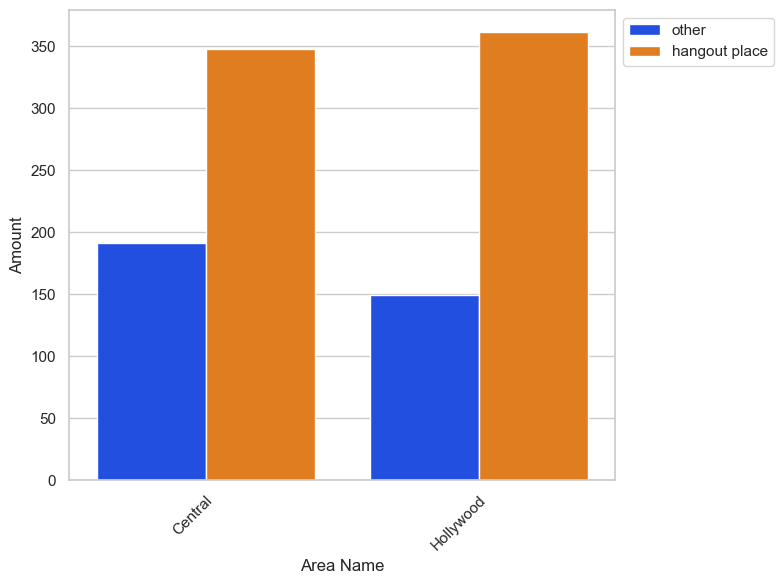

In [104]:
CentralANDHollywood_df['hangout_category'] = CentralANDHollywood_df['hang-out place'].apply(lambda x: 'hangout place' if x else 'other')


fig, ax = plt.subplots(figsize=(8,6))
sns.countplot(data=CentralANDHollywood_df, x='area_name', hue='hangout_category', ax=ax, palette='bright')
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right', rotation_mode='anchor')
ax.set_title('')
ax.set_xlabel('Area Name')
ax.set_ylabel('Amount')
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.tight_layout()
plt.show()










- Both in Central and Hollywood, most incidents occur primarily at entertainment venues

##### 5.6 Examining what happened over the years regarding crimes in Hollywood and Central

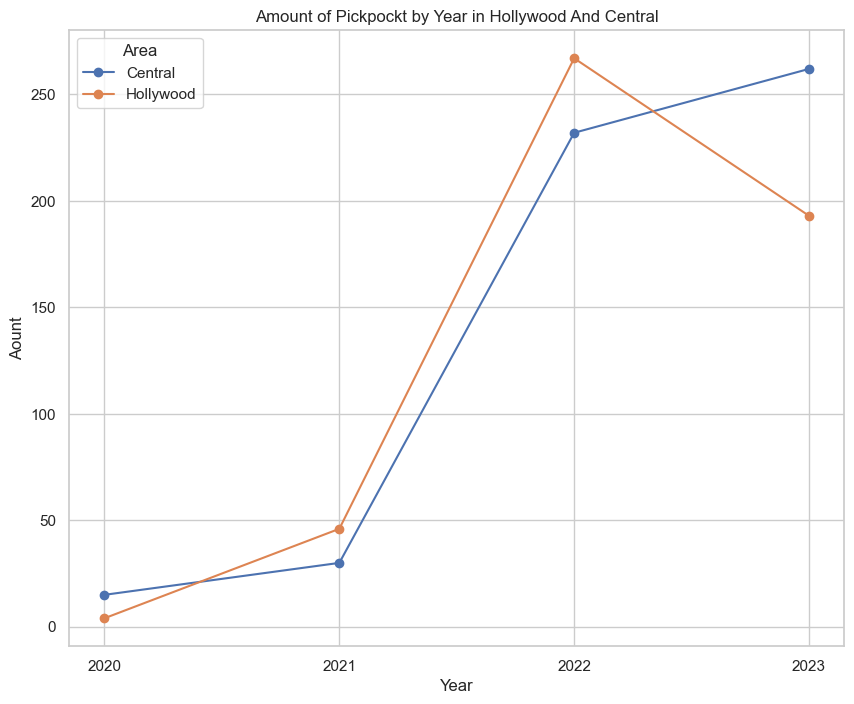

In [107]:
grouped_df= CentralANDHollywood_df.groupby(['area_name', 'year_occurred']).size().reset_index(name='count')

plt.figure(figsize=(10,8))


for area in grouped_df['area_name'].unique():
    area_data = grouped_df[grouped_df['area_name'] == area]
    plt.plot(area_data['year_occurred'], area_data['count'], marker='o', label=area)


plt.xlabel('Year')
plt.ylabel('Aount')
plt.title('Amount of Pickpockt by Year in Hollywood And Central')
plt.xticks(grouped_df['year_occurred'].unique())  
plt.legend(title='Area')


plt.grid(True)
plt.show()

- There has been a notable rise in pickpocketing incidents in both areas between 2020 and 2022. However, it appears that there was a decrease in Hollywood from 2022 to 2023, whereas Central saw an increase during the same period

In [109]:
status_description_counts = CentralANDHollywood_df["status_description"].value_counts().reset_index()
status_description_counts.columns = ['status_description', 'count']
status_description_counts

,status_description,count
0,Invest Cont,1045
1,Adult Arrest,4


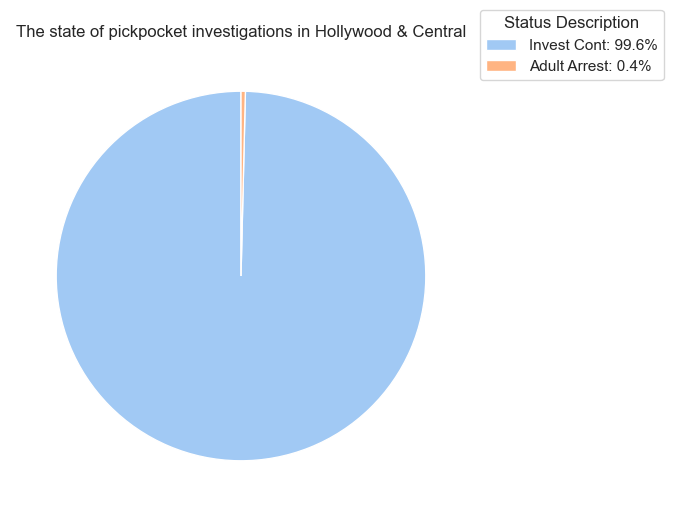

In [110]:
status_description_counts['percentage'] = (status_description_counts['count'] / status_description_counts['count'].sum()) * 100


fig, ax = plt.subplots(figsize=(6,6))
wedges, texts = ax.pie(status_description_counts['percentage'], startangle=90, colors=sns.color_palette("pastel"))


legend_labels = [f'{desc}: {pct:.1f}%' for desc, pct in zip(status_description_counts['status_description'], status_description_counts['percentage'])]
ax.legend(wedges, legend_labels, title="Status Description", loc="center left", bbox_to_anchor=(1, 0.5, 0.5, 1))


ax.set_title('The state of pickpocket investigations in Hollywood & Central')


plt.show()

<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
    Third Conclusion
</div>


#### The central entertainment venues in Los Angeles experience the highest number of pickpocketing crimes, especially on weekends and at night, and the police do not address these cases.

In [113]:
relevant_crimes = [
    'CHILD ABUSE (PHYSICAL) - SIMPLE ASSAULT',
    'CHILD ABUSE (PHYSICAL) - AGGRAVATED ASSAULT',"BATTERY - SIMPLE ASSAULT","ASSAULT WITH DEADLY WEAPON, AGGRAVATED ASSAUL",
    "OTHER ASSAULT"
    
    
]

Under_age_18_df = crime_data [(crime_data ["age_description"] == "child") | (crime_data ["age_description"] == "teenager")]
Under_age_18_df = Under_age_18_df[Under_age_18_df['crime_description'].isin(relevant_crimes)]

## 6. Physical Violence Against Children and Adolescents

##### 6.1 Analysis of the Places Where Children and Adolescents Suffered from Violence

In [116]:
child_df = Under_age_18_df[Under_age_18_df["age_description"] == "child"]
child_df_place_count = child_df['premise_description'].value_counts().reset_index()
child_df_place_count.columns = ["place_description", "amount"]



teenager_df = Under_age_18_df[Under_age_18_df["age_description"] == "teenager"]
teenager_df_place_count = teenager_df['premise_description'].value_counts().reset_index()
teenager_df_place_count.columns = ["place_description", "amount"]

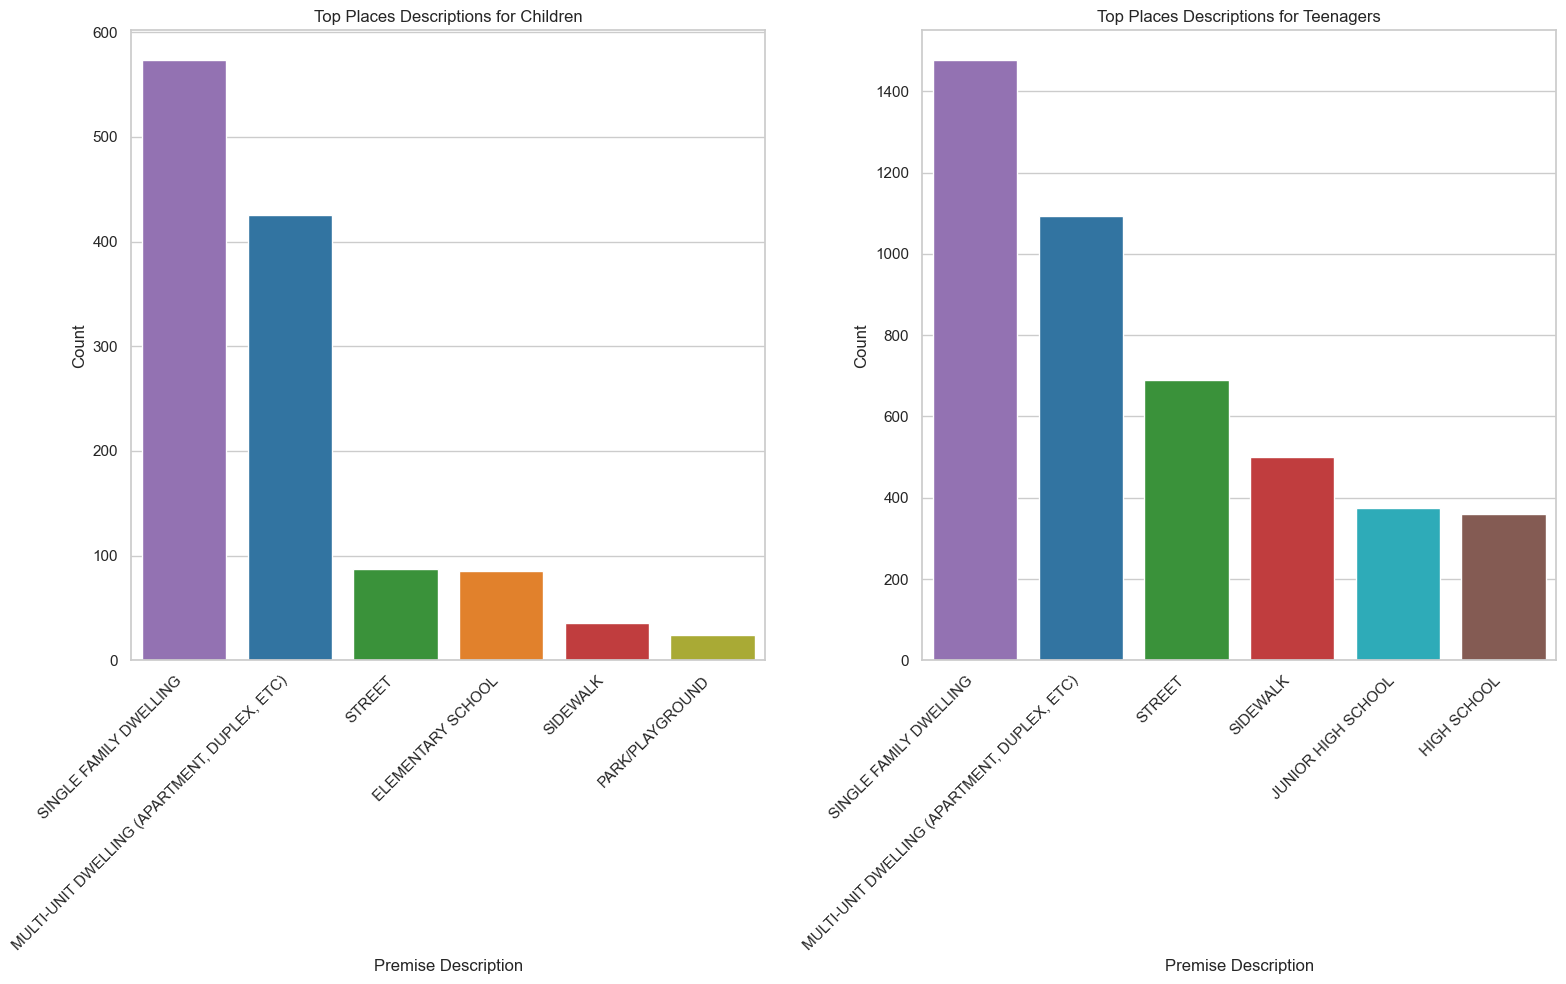

In [117]:
top_child_places = child_df_place_count.head(6)
top_teenager_places = teenager_df_place_count.head(6)


common_places = set(top_child_places['place_description']).intersection(set(top_teenager_places['place_description']))


custom_palette = ['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#17becf', '#bcbd22']  # כחול, כתום, ירוק, אדום, סגול, חום, טורקיז, צהוב ירקרק
unique_places = list(set(top_child_places['place_description']).union(set(top_teenager_places['place_description'])))
color_mapping = {place: custom_palette[i % len(custom_palette)] for i, place in enumerate(unique_places)}


plt.figure(figsize=(16, 10))


plt.subplot(1, 2, 1)
sns.barplot(data=top_child_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_child_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Children')
plt.xlabel('Premise Description')
plt.ylabel('Count')
plt.subplot(1, 2, 2)
sns.barplot(data=top_teenager_places, x='place_description', y='amount', palette=[color_mapping[place] for place in top_teenager_places['place_description']])
plt.xticks(rotation=45, ha="right")
plt.title('Top Places Descriptions for Teenagers')
plt.xlabel('Premise Description')
plt.ylabel('Count')


plt.tight_layout()
plt.show()


- Both offenses against teenagers and offenses against children under the age of 10 occurred most frequently in residential areas.

##### 6.2 Creating a column to identify incident locations: residential areas, schools, or elsewhere.

In [120]:
residential_areas = [
    'SINGLE FAMILY DWELLING', 'MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)',
    'GROUP HOME', 'OTHER RESIDENCE', 'YARD (RESIDENTIAL/BUSINESS)',
    'CONDOMINIUM/TOWNHOUSE', 'MOBILE HOME/TRAILERS/CONSTRUCTION TRAILERS/RV\'S/MOTORHOME',
    'FOSTER HOME BOYS OR GIRLS*', 'PROJECT/TENEMENT/PUBLIC HOUSING', 'PORCH, RESIDENTIAL',
    'TRANSIENT ENCAMPMENT', 'SINGLE RESIDENCE OCCUPANCY (SRO\'S) LOCATIONS'
]

schools = [
    'HIGH SCHOOL', 'JUNIOR HIGH SCHOOL', 'ELEMENTARY SCHOOL',
    'SPECIALTY SCHOOL/OTHER', 'PRIVATE SCHOOL/PRESCHOOL', 'DAY CARE/CHILDREN*',
    'BUS, SCHOOL, CHURCH', 'COLLEGE/JUNIOR COLLEGE/UNIVERSITY', 'DAY CARE/ADULTS*',
    'TRADE SCHOOL (MEDICAL-TECHNICAL-BUSINESS)*', 'FRAT HOUSE/SORORITY/DORMITORY'
]

def categorize_premise(premise):
    if premise in residential_areas:
        return 'Residential Areas'
    elif premise in schools:
        return 'Schools'
    else:
        return 'Elsewhere'

Under_age_18_df['where_did_it_happen'] = Under_age_18_df['premise_description'].apply(categorize_premise)

In [121]:
Under_age_18_df_value_counts = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
Under_age_18_df_value_counts.columns = ['where_did_it_happen', 'amount']
Under_age_18_df_value_counts

,where_did_it_happen,amount
0,Residential Areas,3806
1,Elsewhere,2429
2,Schools,974


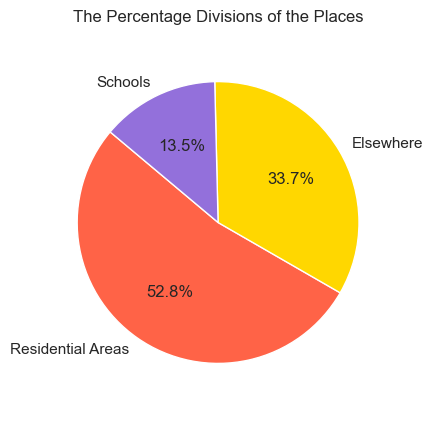

In [122]:
pie_data = Under_age_18_df['where_did_it_happen'].value_counts().reset_index()
pie_data.columns = ['where_did_it_happen', 'amount']

colors = ['#FF6347', '#FFD700', '#9370DB']


plt.figure(figsize=(4,5))
plt.pie(pie_data['amount'], labels=pie_data['where_did_it_happen'], autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('The Percentage Divisions of the Places')
plt.axis('equal') 


plt.show()

- It can now be definitively understood that most cases of violence against teenagers occurred in residential areas.

##### 6.3 Investigation Status Analysis

In [125]:
cross_tab = pd.crosstab(Under_age_18_df['where_did_it_happen'], Under_age_18_df['status_description'])
from IPython.display import display
display(cross_tab)

status_description,Adult Arrest,Adult Other,Invest Cont,Juv Arrest,Juv Other
where_did_it_happen,,,,,
Elsewhere,184,397,1733,29,86
Residential Areas,919,1455,1296,52,84
Schools,43,167,628,25,111


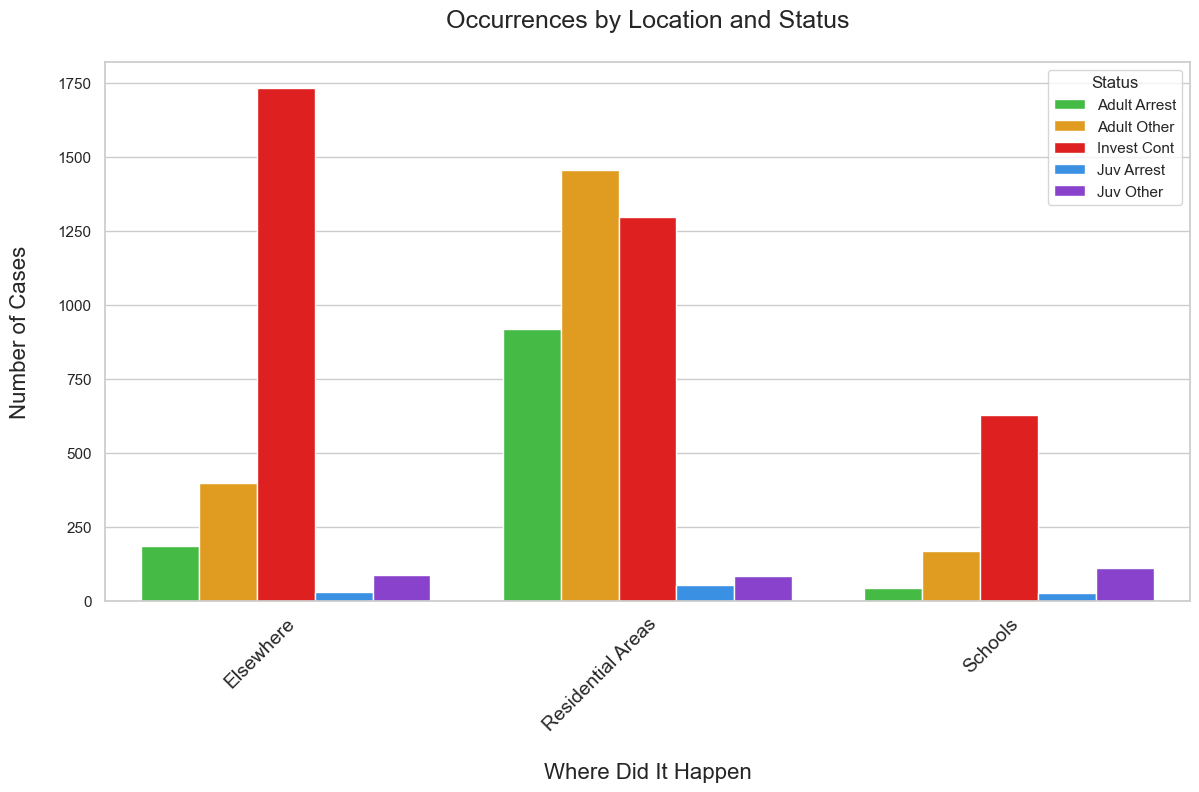

In [126]:
cross_tab = pd.crosstab(Under_age_18_df['where_did_it_happen'], Under_age_18_df['status_description'])


cross_tab_long = cross_tab.reset_index().melt(id_vars='where_did_it_happen', value_vars=cross_tab.columns, 
                                              var_name='Status', value_name='Count')


palette = ['#32CD32', '#FFA500', '#FF0000', '#1E90FF', '#8A2BE2'] 


plt.figure(figsize=(14, 7))
sns.barplot(data=cross_tab_long, x='where_did_it_happen', y='Count', hue='Status', palette=palette)

plt.title("Occurrences by Location and Status", fontsize=18, pad=25)  
plt.xlabel("Where Did It Happen", fontsize=16, labelpad=20)  
plt.ylabel("Number of Cases", fontsize=16, labelpad=20)  

plt.xticks(rotation=45, ha='right', fontsize=14, rotation_mode='anchor')

plt.show()

- Most investigations into violent crimes against children and adolescents under 18 remain open
- A concerning statistic: many cases were committed by adults.

##### 6.4 Analysis of whether the offender is an adult or a juvenile

In [129]:
cross_tab['Adult Count'] = cross_tab.filter(like='Adult').sum(axis=1)
cross_tab['Juvenile Count'] = cross_tab.filter(like='Juv').sum(axis=1)
cross_tab['Investigation Count'] = cross_tab.filter(like='Invest Cont').sum(axis=1)

summary_df = cross_tab[['Adult Count', 'Juvenile Count', 'Investigation Count']]
from IPython.display import display
display(summary_df)



status_description,Adult Count,Juvenile Count,Investigation Count
where_did_it_happen,,,
Elsewhere,581,115,1733
Residential Areas,2374,136,1296
Schools,210,136,628


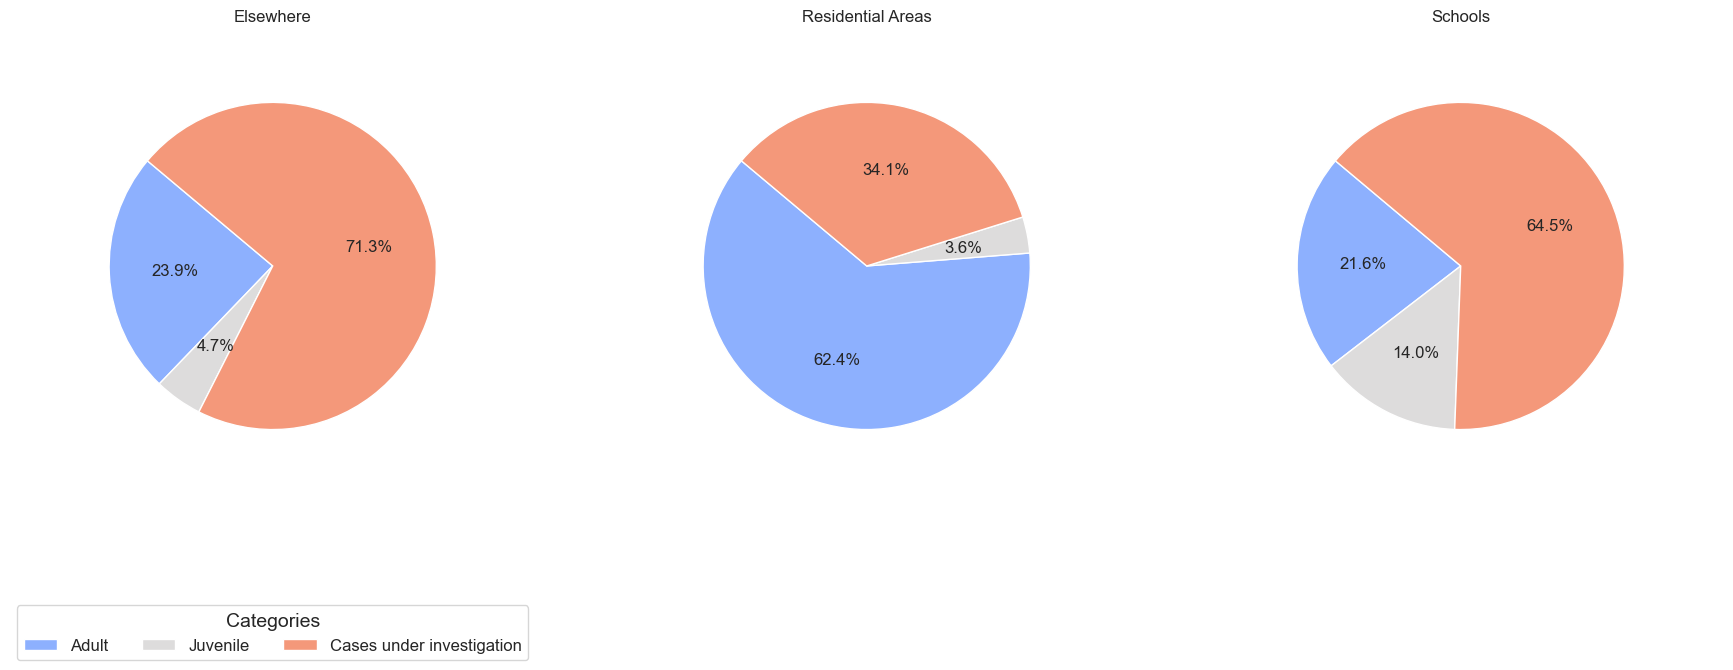

In [130]:
summary_df = cross_tab[['Adult Count', 'Juvenile Count', 'Investigation Count']]
locations = ['Elsewhere', 'Residential Areas', 'Schools']

fig, axes = plt.subplots(1, 3, figsize=(18, 7))
colors = sns.color_palette("coolwarm", 3)

locations = ['Elsewhere', 'Residential Areas', 'Schools']
for i, location in enumerate(locations):
    location_data = cross_tab[['Adult Count', 'Juvenile Count', 'Investigation Count']].loc[location]
    axes[i].pie(location_data, autopct='%1.1f%%', startangle=140, colors=colors)
    axes[i].set_title(f'{location}')
    axes[i].axis('equal')


axes[0].legend(['Adult', 'Juvenile', 'Cases under investigation'], loc="upper center", fontsize=12, title="Categories", title_fontsize=14, bbox_to_anchor=(0.5, -0.2), ncol=3)

plt.tight_layout()
plt.show()

<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
    Fourth Conclusion
</div>

##### 1. It can be seen that most of the cases that occurred in residential areas were committed by adults


##### 2. The police place emphasis on punishment for cases that occurred in residential areas

##### 3. The police are unable to capture most of the criminals who behaved violently towards children and teenagers in schools and other locations

## 7. Use Of Firearms On 77th Street

##### 7.1 Case analysis by location

In [137]:
firearm_df = crime_data[crime_data["weapon_category"] == "firearm"] 
sharp_weapon_df = crime_data[crime_data["weapon_category"] == "Physical strength"]

area_name_counts = firearm_df['area_name'].value_counts().reset_index()

area_name_counts.columns = ['area_name', 'count']

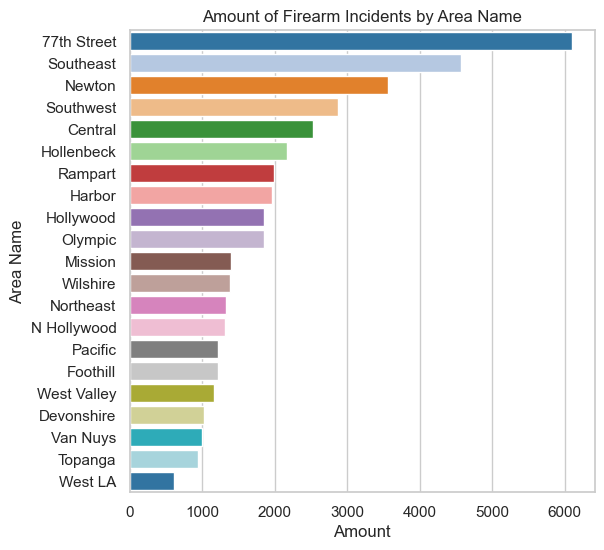

In [138]:
palette = sns.color_palette("tab20", len(area_name_counts))


sns.set_theme(style="whitegrid")

fig, ax = plt.subplots(figsize=(6,6))


bar_plot = sns.barplot(data=area_name_counts, y='area_name', x='count', palette=palette, ax=ax)


ax.set_title('Amount of Firearm Incidents by Area Name')
ax.set_xlabel('Amount')
ax.set_ylabel('Area Name')

plt.show()

- We can see that the most common area for firearm use is 77th Street

##### 7.2 Analysis case by place on 77th Street

In [141]:
th77_firearm_df = firearm_df[firearm_df["area_name"] =="77th Street"]
premise_description_counts = th77_firearm_df['premise_description'].value_counts().reset_index()
premise_description_counts.columns = ['premise_description', 'count']
premise_description_counts.head(10)

,premise_description,count
0,STREET,3041
1,SINGLE FAMILY DWELLING,744
2,SIDEWALK,587
3,PARKING LOT,342
4,"MULTI-UNIT DWELLING (APARTMENT, DUPLEX, ETC)",294
5,ALLEY,138
6,OTHER BUSINESS,105
7,GAS STATION,96
8,DRIVEWAY,85
9,"VEHICLE, PASSENGER/TRUCK",57


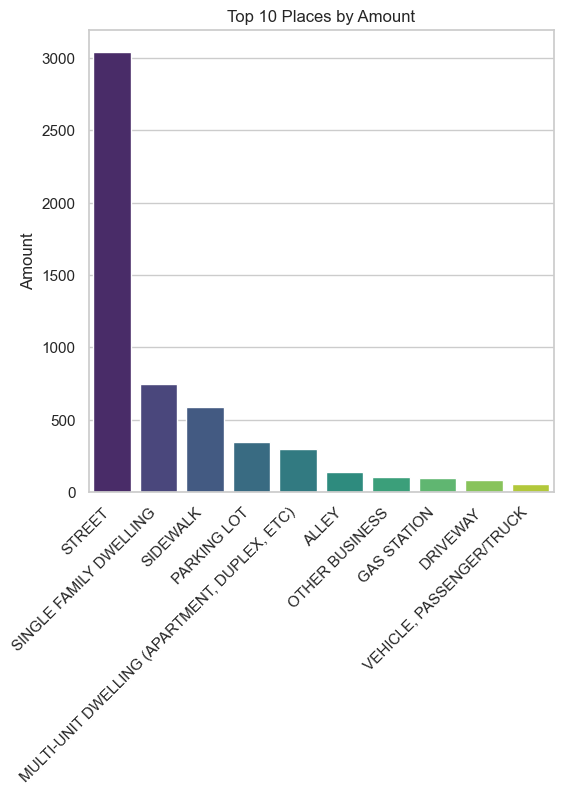

In [142]:
fig, ax = plt.subplots(figsize=(6,6))


palette = sns.color_palette("viridis", n_colors=10)
sns.barplot(x='premise_description', y='count', data=premise_description_counts.head(10), ax=ax, palette=palette)


ax.set_title('Top 10 Places by Amount')
ax.set_xlabel('')
ax.set_ylabel('Amount')


plt.xticks(rotation=45,ha = "right")


plt.show()

- we can see that most cases occurred on the street

##### 7.3 Create a column indicating if the crime was in a public or private place

In [145]:
public_places = [
    'TRAIN TRACKS',
    'TOW YARD',
    'OTHER/OUTSIDE',
    'TUNNEL',
    'VACANT LOT',
    'SWAP MEET',
    'FREEWAY',
    'SHOPPING MALL (COMMON AREA)',
    'PARK/PLAYGROUND',
    'MARKET',
    'BUS STOP',
    'GAS STATION',
    'ALLEY',
    'PARKING LOT',
    'SIDEWALK',
    'STREET',
    "TRANSIENT ENCAMPMENT",
]


th77_firearm_df['public_or_private'] = th77_firearm_df['premise_description'].apply(lambda x: 'public place' if x in public_places else 'private place')

In [146]:
public_private_counts = th77_firearm_df['public_or_private'].value_counts().reset_index()
public_private_counts.columns = ["public_or_private", "count"]
public_private_counts

,public_or_private,count
0,public place,4306
1,private place,1800


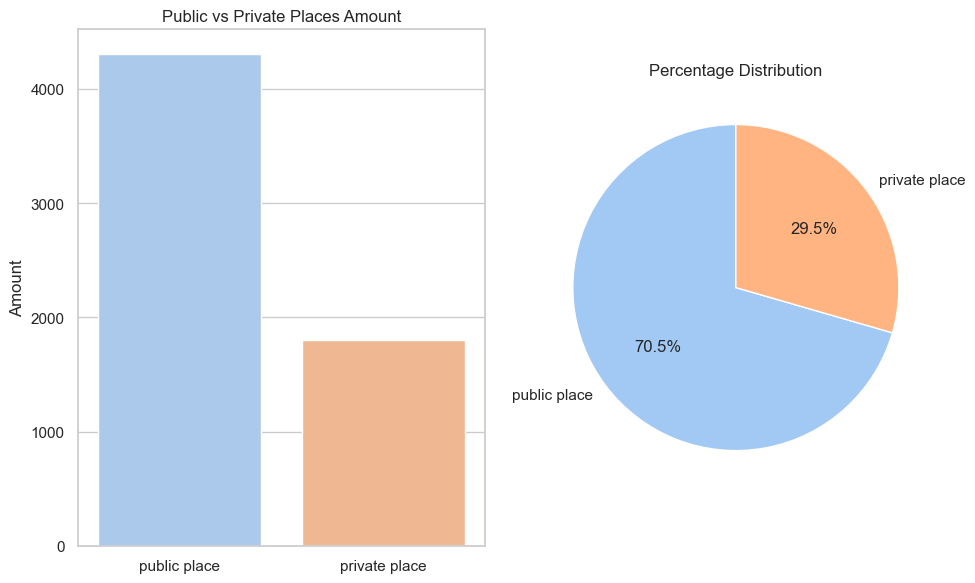

In [147]:
colors = sns.color_palette("pastel")[0:2]


fig, axes = plt.subplots(1, 2, figsize=(10,6))


sns.barplot(x='public_or_private', y='count', data=public_private_counts, ax=axes[0], palette=colors)
axes[0].set_title('Public vs Private Places Amount')
axes[0].set_xlabel('')
axes[0].set_ylabel('Amount')


axes[1].pie(public_private_counts['count'], labels=public_private_counts['public_or_private'], autopct='%1.1f%%', startangle=90, colors=colors)
axes[1].set_title('Percentage Distribution')


plt.tight_layout()
plt.show()

- There is a significant difference in the use of firearms in public versus private places.

##### 7.4 Analysis of the trend in firearm use over the years

In [150]:
area_year_counts = th77_firearm_df.groupby(['public_or_private', 'year_occurred']).size().reset_index(name='count')

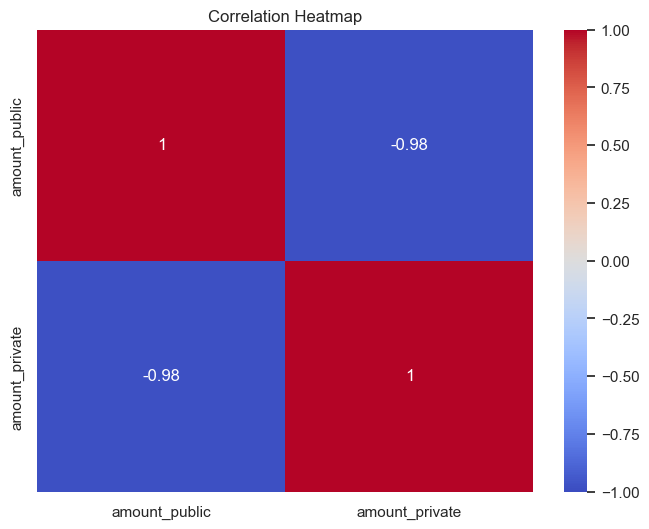

In [151]:
public_counts = area_year_counts[area_year_counts['public_or_private'] == 'public place'][['year_occurred', 'count']].rename(columns={'count': 'amount_public'})
private_counts = area_year_counts[area_year_counts['public_or_private'] == 'private place'][['year_occurred', 'count']].rename(columns={'count': 'amount_private'})


merged_counts = pd.merge(public_counts, private_counts, on='year_occurred', how='outer')


merged_counts.fillna(0, inplace=True)


correlation_matrix = merged_counts[['amount_public', 'amount_private']].corr()


plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)


plt.title('Correlation Heatmap')


plt.show()


- The strong negative correlation highlights the relationship between firearm-related crimes in public versus private locations on 77th Street

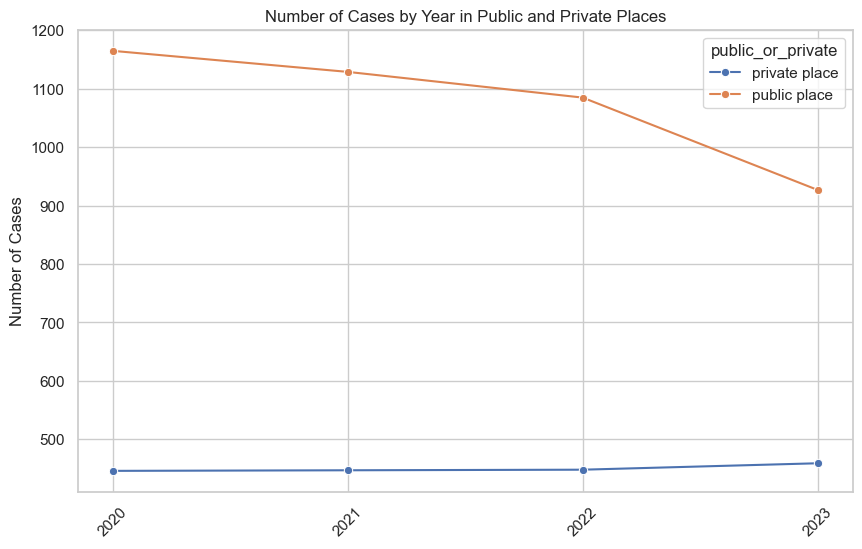

In [153]:
fig, ax = plt.subplots(1, 1, figsize=(10,6))


sns.lineplot(data=area_year_counts, x='year_occurred', y='count', hue='public_or_private', marker='o', ax=ax)


ax.set_title('Number of Cases by Year in Public and Private Places')
ax.set_xlabel('')
ax.set_ylabel('Number of Cases')


ax.set_xticks(area_year_counts['year_occurred'].unique())
ax.set_xticklabels(area_year_counts['year_occurred'].unique(), rotation=45)


plt.show()

<div style="
    text-align: left;
    font-size: 32px;
    font-weight: bold;
    color: #000000;
    text-shadow: 2px 2px 5px #888888;
    margin-top: 20px;
    margin-bottom: 20px;
    font-family: Arial, sans-serif;">
    Fifth Conclusion
</div>

##### It can be seen that over the years, the use of firearms in public places on 77th Street has decreased. However, the use in public places on 77th Street remains relatively static